# Exploratory Data Analysis

In [28]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython
%R require(ggplot2);
%matplotlib inline

# Change directory
%cd /Users/denis/Documents/Projects/analysis-pipelines/geneshot-benchmark

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [44]:
# Get infiles
autorif_file = 's1-feather.dir/autorif_overlap.feather'
generif_file = 's1-feather.dir/generif_overlap.feather'
list_file = './rawdata.dir/list_off_co.tsv'

In [45]:
# Read autorif
autorif_dataframe = pd.read_feather(autorif_file).set_index('gene_symbol')
autorif_dataframe.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,1300017J02RIK,1700013H16RIK,1700093K21RIK,2010109I03RIK,2410089E03RIK,2610528A11RIK,2700046G09RIK,2810006K23RIK,2900011O08RIK,4933436H12RIK,...,ZSCAN18,ZSCAN31,ZSCAN4,ZSCAN4D,ZSCAN5B,ZSWIM2,ZSWIM6,ZUP1,ZW10,ZYX
gene_symbol,,,,,,,,,,,,,,,,,,,,,
1300017J02RIK,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700013H16RIK,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700093K21RIK,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010109I03RIK,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2410089E03RIK,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
autorif_dataframe.loc['TP53', 'TP53']

10000

In [218]:
generif_dataframe.loc['TP53', 'TP53']

4304

In [222]:
autorif_dataframe.loc['TRP53', 'TRP53']

10000

In [223]:
generif_dataframe.loc['TRP53', 'TRP53']

703

In [46]:
# Read generif
generif_dataframe = pd.read_feather(generif_file).set_index('gene_symbol')
generif_dataframe.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


,1190002N15RIK,1300017J02RIK,1700003E16RIK,1700013H16RIK,1700020D05RIK,1700024G13RIK,1700093K21RIK,1810009J06RIK,2010109I03RIK,2010111I01RIK,...,ZSCAN31,ZSCAN4,ZSCAN4D,ZSCAN5B,ZSWIM2,ZSWIM6,ZUP1,ZW10,ZYX,ZZEF1
gene_symbol,,,,,,,,,,,,,,,,,,,,,
1190002N15RIK,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300017J02RIK,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700003E16RIK,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700013H16RIK,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700020D05RIK,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
generif_dataframe.shape

(11433, 11433)

In [48]:
autorif_dataframe.shape

(11086, 11086)

In [135]:
dataframes = {'generif': generif_dataframe, 'autorif': autorif_dataframe}

## 1. Gene Citation Counts

In [137]:
# Comparison dataframe
gene_symbols = set(generif_dataframe.index).intersection(set(autorif_dataframe.index))
# comparison_dataframe = pd.DataFrame({'generif': np.diag(generif_dataframe.loc[gene_symbols, gene_symbols]), 'autorif': np.diag(autorif_dataframe.loc[gene_symbols, gene_symbols])}, index=gene_symbols).rename_axis('gene_symbol')
comparison_dataframe = pd.DataFrame({key: np.diag(value.loc[gene_symbols, gene_symbols]) for key, value in dataframes.items()}, index=gene_symbols).rename_axis('gene_symbol')
comparison_dataframe.head()

,generif,autorif
gene_symbol,,
GUCA1B,8,62
CFAP43,3,5
GRID2IP,4,13
PYY,31,2314
ASB17,1,8


In [226]:
comparison_dataframe['difference'] = [rowData['generif']-rowData['autorif'] for index, rowData in comparison_dataframe.iterrows()]
comparison_dataframe.head()

,generif,autorif,difference
gene_symbol,,,
GUCA1B,8,62,-54
CFAP43,3,5,-2
GRID2IP,4,13,-9
PYY,31,2314,-2283
ASB17,1,8,-7


In [138]:
# Melt
comparison_dataframe_melt = pd.melt(comparison_dataframe.reset_index(), id_vars='gene_symbol')
comparison_dataframe_melt.head()

,gene_symbol,variable,value
0,GUCA1B,generif,8
1,CFAP43,generif,3
2,GRID2IP,generif,4
3,PYY,generif,31
4,ASB17,generif,1


    generif           autorif       
 Min.   :   1.00   Min.   :    1.0  
 1st Qu.:   3.00   1st Qu.:   12.0  
 Median :   7.00   Median :   44.0  
 Mean   :  32.58   Mean   :  442.8  
 3rd Qu.:  23.00   3rd Qu.:  176.0  
 Max.   :4304.00   Max.   :10000.0  


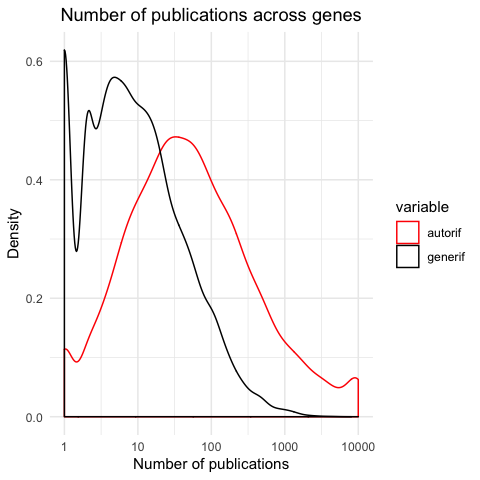

In [131]:
%%R -i comparison_dataframe_melt -r 100
ticks <- 10**seq(0, 4)
print(summary(comparison_dataframe))
ggplot(comparison_dataframe_melt, aes(x=value, color=variable)) + 
    geom_density() +
    scale_x_log10(breaks=ticks, labels=ticks) +
    xlab('Number of publications') +
    ylab('Density') +
    ggtitle('Number of publications across genes') +
    scale_color_manual(values=c('red', 'black')) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

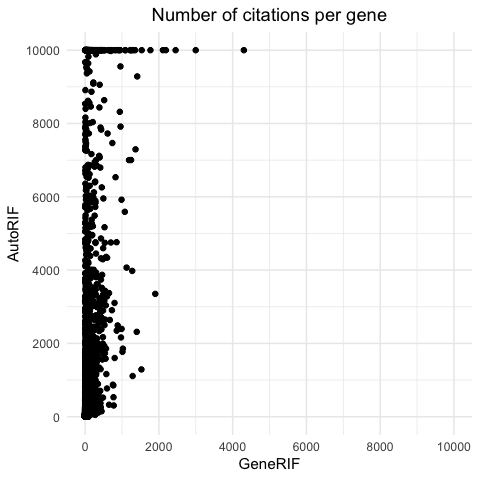

In [117]:
%%R -i comparison_dataframe -r 100
lim <- c(0, 10000)
ticks <- seq(lim[1], lim[2], 2000)
ggplot(comparison_dataframe, aes(x=generif, y=autorif)) + 
    geom_point() +
    scale_x_continuous(lim=lim, breaks=ticks, labels=ticks) +
    scale_y_continuous(lim=lim, breaks=ticks, labels=ticks) +
    xlab('GeneRIF') +
    ylab('AutoRIF') +
    ggtitle('Number of citations per gene') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

## 2. Co-mentioned Genes

In [156]:
# Get co-mentions
comention_dataframe = pd.DataFrame({key: value.loc[gene_symbols].apply(lambda x: sum(x > 0)-1) for key, value in dataframes.items()}, index=gene_symbols).rename_axis('gene_symbol')
comention_dataframe.head()

,generif,autorif
gene_symbol,,
GUCA1B,2,29
CFAP43,1034,7
GRID2IP,0,30
PYY,2,264
ASB17,0,1


In [144]:
# Melt
comention_dataframe_melt = pd.melt(comention_dataframe.reset_index(), id_vars='gene_symbol')
comention_dataframe_melt.head()

,gene_symbol,variable,value
0,GUCA1B,generif,2
1,CFAP43,generif,1034
2,GRID2IP,generif,0
3,PYY,generif,2
4,ASB17,generif,0


    generif          autorif      
 Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   1.0   1st Qu.:  23.0  
 Median :   5.0   Median :  65.0  
 Mean   : 273.8   Mean   : 167.7  
 3rd Qu.: 185.0   3rd Qu.: 175.0  
 Max.   :2538.0   Max.   :3060.0  


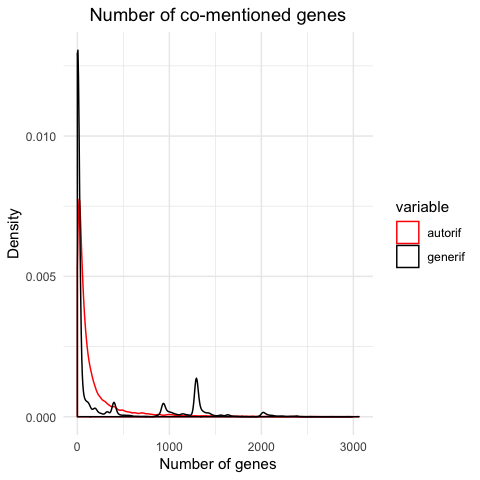

In [163]:
%%R -i comention_dataframe_melt -r 100
ticks <- 10**seq(0, 4)
print(summary(comention_dataframe))
ggplot(comention_dataframe_melt, aes(x=value, color=variable)) + 
    geom_density() +
#     scale_x_log10(breaks=ticks, labels=ticks) +
    xlab('Number of genes') +
    ylab('Density') +
    ggtitle('Number of co-mentioned genes') +
    scale_color_manual(values=c('red', 'black')) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

    generif          autorif      
 Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   1.0   1st Qu.:  23.0  
 Median :   5.0   Median :  65.0  
 Mean   : 273.8   Mean   : 167.7  
 3rd Qu.: 185.0   3rd Qu.: 175.0  
 Max.   :2538.0   Max.   :3060.0  


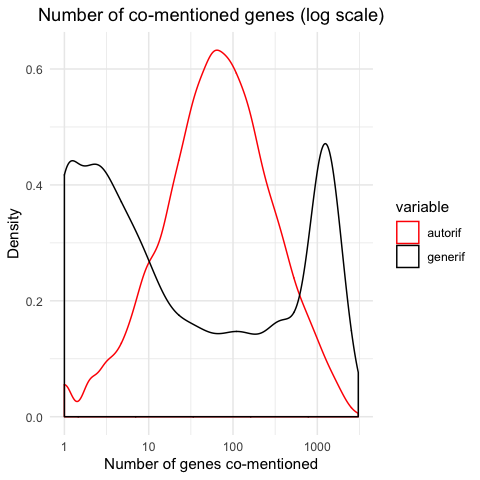

In [164]:
%%R -i comention_dataframe_melt -r 100
ticks <- 10**seq(0, 5)
print(summary(comention_dataframe))
ggplot(comention_dataframe_melt, aes(x=value, color=variable)) + 
    geom_density() +
    scale_x_log10(breaks=ticks, labels=ticks) +
    xlab('Number of genes co-mentioned') +
    ylab('Density') +
    ggtitle('Number of co-mentioned genes (log scale)') +
    scale_color_manual(values=c('red', 'black')) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

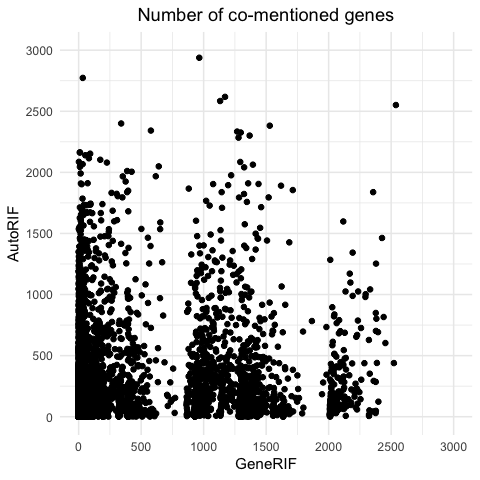

In [159]:
%%R -i comention_dataframe -r 100
lim <- c(0, 3000)
ticks <- seq(lim[1], lim[2], 500)
ggplot(comention_dataframe, aes(x=generif, y=autorif)) + 
    geom_point() +
    scale_x_continuous(lim=lim, breaks=ticks, labels=ticks) +
    scale_y_continuous(lim=lim, breaks=ticks, labels=ticks) +
    xlab('GeneRIF') +
    ylab('AutoRIF') +
    ggtitle('Number of co-mentioned genes') +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

In [200]:
rif_dataframe = autorif_dataframe.copy()
rif_dataframe.head()

# Fill diagonal
np.fill_diagonal(rif_dataframe.values, 0)

rif_dataframe.head()

# Filter edges
edge_dataframe = pd.melt(rif_dataframe.reset_index(), id_vars='gene_symbol').rename(columns={'gene_symbol': 'source', 'variable': 'target', 'value': 'publications'}).query('publications > 50')
edge_dataframe.head()

# Get pairs
edge_dataframe['pair'] = [str(set([rowData['source'], rowData['target']])) for index, rowData in edge_dataframe.iterrows()]

# Drop duplicates
print(edge_dataframe.shape)
edge_dataframe.drop_duplicates('pair', inplace=True)
print(edge_dataframe.shape)

In [212]:
edge_dataframe = pd.read_table('s2-edges.dir/generif_overlap-network.txt').query('publications > 15')
edge_dataframe.to_csv('generif_network_filtered.txt', index=False, sep='\t')
edge_dataframe.head()

,source,target,publications
8593,ABCG1,ABCA1,32
8678,APOA1,ABCA1,56
8681,APOA5,ABCA1,20
8682,APOB,ABCA1,18
8686,APOC3,ABCA1,18
